In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config ZMQInteractiveShell.ast_node_interactivity='all'
%pprint

Pretty printing has been turned OFF


In [2]:
# 大小设置
sns.set(rc={'figure.figsize':(13,7)})
# 风格设置
sns.set_style("whitegrid")

goal = 'target'

- 目的：将不错的模型进行加权融合。
- 思路：RF、GBDT、XGBoost常见面试题整理https://zhuanlan.zhihu.com/p/34679467
- 强化版：
       GBDT对异常值敏感，RF对异常值不敏感；
       随机森林是通过减少模型的方差来提高性能，而GBDT是减少模型的偏差来提高性能；
       随机森林不需要进行数据预处理，即特征归一化。而GBDT则需要进行特征归一化。


# 加载预测数据

- sample_submit04-1328-xgb-delOutlies.txt：去异常且调过参之后的xgb结果。
- sample_submit05-1399-lgb-delOutlies.txt：去异常且调过参之后的lgb结果。
- sample_submit07-1284-rf.txt：未去异常、调过参之后的RF结果

In [3]:
submission4 = pd.read_table('../result/sample_submit04-1328-xgb-delOutlies.txt', sep='\t', header=None, names=None, index_col=None)
submission4.columns = [goal]
submission5 = pd.read_table('../result/sample_submit05-1399-lgb-delOutlies.txt', sep='\t', header=None, names=None, index_col=None)
submission5.columns = [goal]
submission7 = pd.read_table('../result/sample_submit07-1284-rf.txt', sep='\t', header=None, names=None, index_col=None)
submission7.columns = [goal]
submission9 = pd.read_table('../result/sample_submit09-1164-ridge.txt', sep='\t', header=None, names=None, index_col=None)
submission9.columns = [goal]

In [4]:
xgb_lgb_rf_ridge_data = pd.DataFrame({"submission4": submission4.target, 
                                "submission5":submission5.target, 
                                "submission7":submission7.target,
                                "submission9":submission9.target})

In [5]:
xgb_lgb_rf_ridge_data.head()

,submission4,submission5,submission7,submission9
0,0.425871,0.494140,0.311136,0.236638
1,0.224224,0.377177,0.199580,0.201320
2,0.048237,0.148564,-0.027754,-0.133111
3,0.177480,0.380818,0.111690,0.027530
4,0.344722,0.457303,0.300254,0.286117


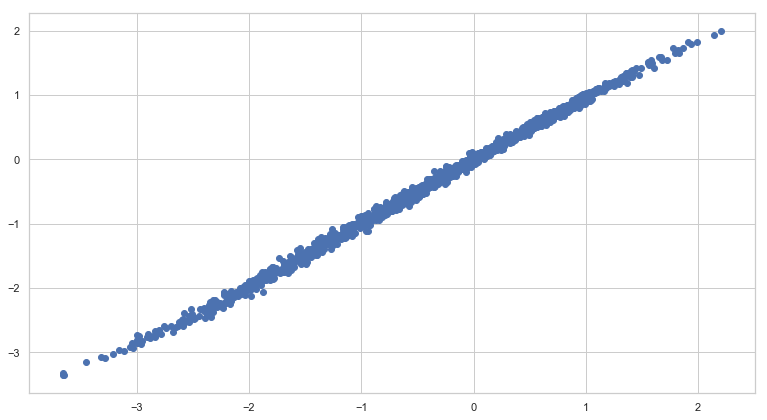

In [6]:
merge_res = 18/27*xgb_lgb_rf_ridge_data.submission9 + 6/27*xgb_lgb_rf_ridge_data.submission7 + 2/27*xgb_lgb_rf_ridge_data.submission5 + 1/27*xgb_lgb_rf_ridge_data.submission4
plt.scatter(xgb_lgb_rf_ridge_data.submission9, merge_res)

In [7]:
submission = pd.DataFrame({goal: merge_res})
submission.to_csv("../result/sample_submit10-xxxx-18_27subm9-6_27subm7-2_27subm5-1_27subm4.txt", sep='\t', index=False, header=False)